# Goldratt's Dice Game

Based in the game played in the book "The Goal" by Dr. Eli Goldratt. This game is able to do a simulation of a flow system, and illustrate the impact of variation. 


Here it was used in the context of having 5 processes in a hospital and patients attending for their appointments. The number of patients that each part of the process is able to attend per day is given by the result on the dice roll.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.giphy.com/media/pdSjtKuNpaQr6/giphy-downsized-large.gif")

Importing packages and initial setting state:

In [74]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PatientsWaiting=np.array([0,0,0,0,0,0,0])
StillWaiting=np.array([0,0,0,0,0,0,0])
Days=np.array([0,0,0,0,0,0,0])
Capacity=np.array([0,0,0,0,0,0,0]) #number of the dice
Activity=np.array([0,0,0,0,0,0,0]) #number that you move

DaysWorking=np.array([1,2,3,4,5,6,7,8,9,10])
Stuff=np.array([1,2,3,4,5,6,0])
Person=np.array([1,2,3,4,5,6,0]) #Person who moved
Round=np.array([0,0,0,0,0,0,0])

Selecting the number of rounds:

In [75]:
Rounds=range(0,500)

Dice Game Configuration:

In [76]:
for r in Rounds: #round start
    for d in DaysWorking: #days taken into account per round
        for s in Stuff: #team member
            Round=np.append(Round,r) #Round
            Dice=random.randint(1,7) #Dice

            Days=np.append(Days,d) #stablish the day
            Person=np.append(Person,s) #Store the id of the person's action
            Capacity=np.append(Capacity,Dice) #dice result is stored

            #Upgrades according to each member:
            if Person[-1]==1:
                PatientsWaiting=np.append(PatientsWaiting,0) #num pf patients in that state is equal to the dice
                Activity=np.append(Activity,Dice)
                StillWaiting=np.append(StillWaiting,Capacity[-1]-Activity[-1]) #Upgrade for the next person

            elif Person[-1]==0: #this is the number of patients outsize
                PatientsWaiting=np.append(PatientsWaiting,0) #num pf patients in that state is equal to the dice
                Activity=np.append(Activity,Activity[-1]+Activity[-7]) #this is the cummulative number of patients being treated
                StillWaiting=np.append(StillWaiting,0) #Upgrade for the next person
                Capacity[-1]=0

            else:    
                PatientsWaiting=np.append(PatientsWaiting,StillWaiting[-7]+Activity[-1]) #num pf patients in that state is equal to the dice
                Activity=np.append(Activity,min(PatientsWaiting[-1],Capacity[-1]))
                StillWaiting=np.append(StillWaiting,PatientsWaiting[-1]-Activity[-1]) #Upgrade for the next person
    
    #To reset initial states
    PatientsWaiting=np.append(PatientsWaiting,[0,0,0,0,0,0,0])
    StillWaiting=np.append(StillWaiting,[0,0,0,0,0,0,0])
    Capacity=np.append(Capacity,[0,0,0,0,0,0,0]) 
    Activity=np.append(Activity,[0,0,0,0,0,0,0])
    Person=np.append(Person,[0,0,0,0,0,0,0]) 
    Round=np.append(Round,[0,0,0,0,0,0,0])
    Days=np.append(Days,[0,0,0,0,0,0,0])




Creating a dataframe with the arrays:

In [78]:
Results=pd.DataFrame()
Results["Round"]=Round
Results["Days"]=Days
Results["Hospital Department"]=Person
Results["Patients Waiting"]=PatientsWaiting
Results["Capacity"]=Capacity
Results["Activity"]=Activity
Results["Patients Still Waiting"]=StillWaiting


FinalResults=Results[Results["Days"]!=0] #Cleaning the dataframe
FinalResults.head(15)


,Round,Days,Hospital Department,Patients Waiting,Capacity,Activity,Patients Still Waiting
7,0,1,1,0,3,3,0
8,0,1,2,3,2,2,1
9,0,1,3,2,6,2,0
10,0,1,4,2,2,2,0
11,0,1,5,2,1,1,1
12,0,1,6,1,2,1,0
13,0,1,0,0,0,1,0
14,0,2,1,0,6,6,0
15,0,2,2,7,6,6,1
16,0,2,3,6,3,3,3


Creating dataframe that contains only the information of the patients that finished their treatment per round

In [81]:
OnlyFinalPatients=FinalResults[(FinalResults["Hospital Department"]==0) & (FinalResults["Days"]==10)]
OnlyFinalPatients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 76 to 38499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Round                   500 non-null    int32
 1   Days                    500 non-null    int32
 2   Hospital Department     500 non-null    int32
 3   Patients Waiting        500 non-null    int32
 4   Capacity                500 non-null    int32
 5   Activity                500 non-null    int32
 6   Patients Still Waiting  500 non-null    int32
dtypes: int32(7)
memory usage: 17.6 KB


<AxesSubplot:xlabel='Activity', ylabel='Count'>

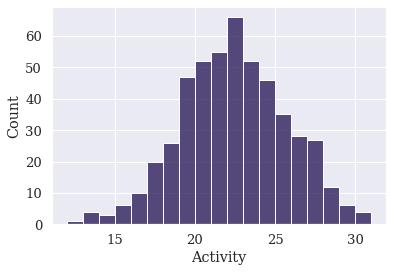

In [82]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")
sns.histplot(data=OnlyFinalPatients, x="Activity")

Creating a dataframe that indicates the average number of patients per each team member:

In [83]:
FinalPerTeamMember=FinalResults[(FinalResults["Hospital Department"]!=0) & (FinalResults["Days"]==10)]

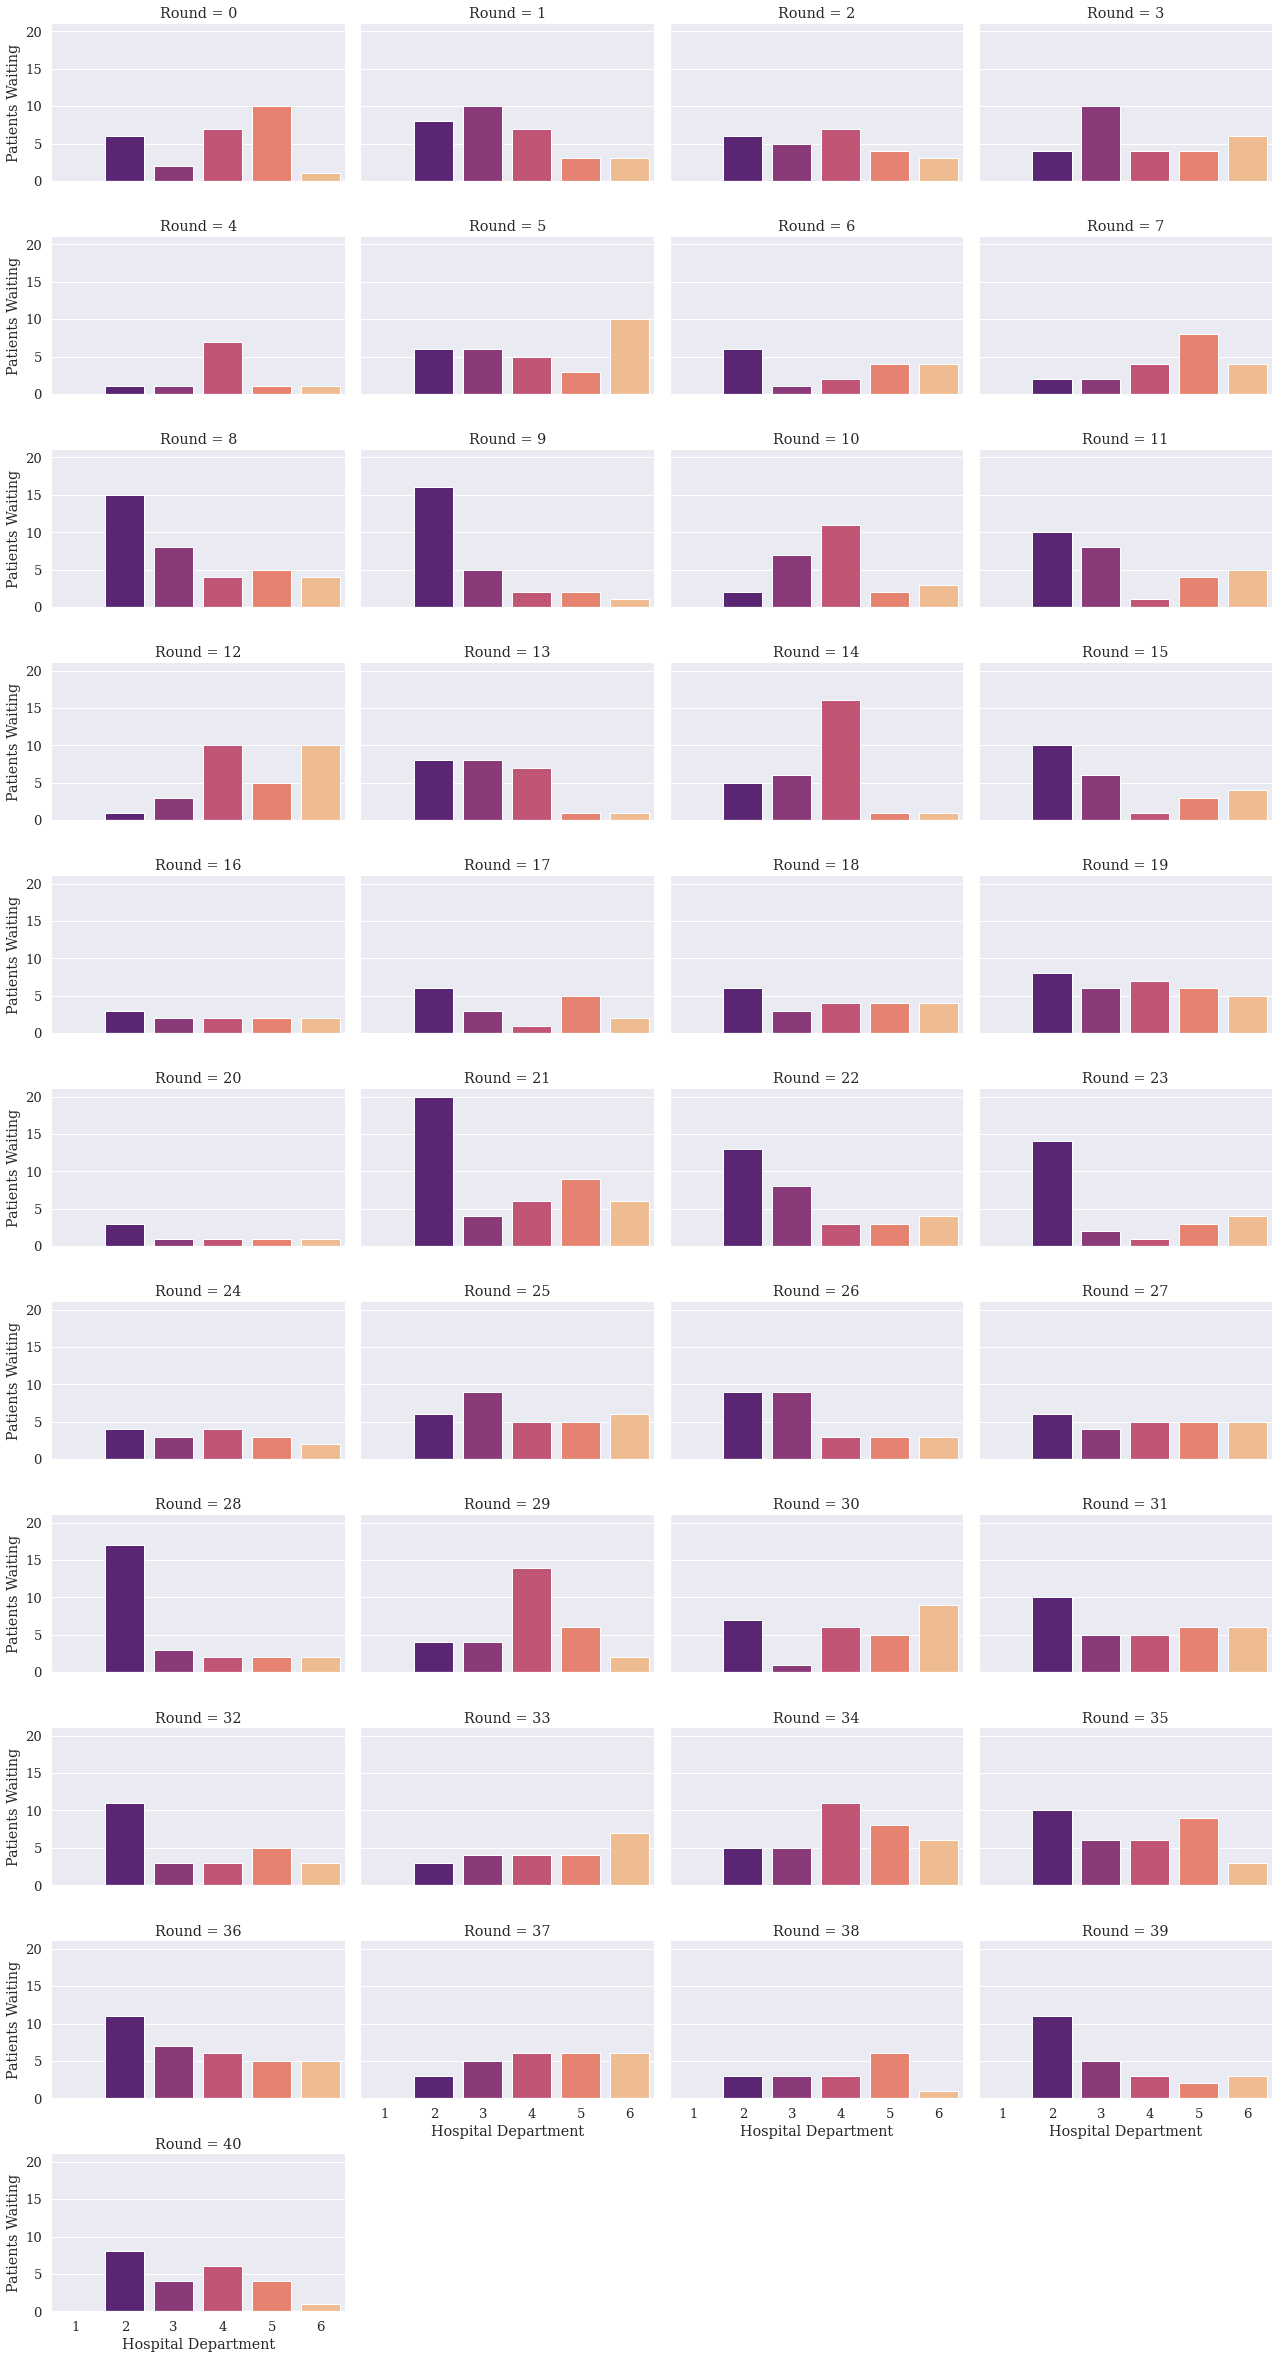

In [88]:
sns.catplot(x="Hospital Department", y="Patients Waiting", data=FinalPerTeamMember[FinalPerTeamMember["Round"]<=40],col="Round",col_wrap=4,kind="bar",height=3,aspect=1.5)

#The tallest bar tell us where the bottle neck was located in the first 20 rounds of the simulation.